In [ ]:
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader
import random
import torch.nn.functional as F

import matplotlib.pyplot as plt


torch.__version__

'2.2.1+cu121'

In [ ]:

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


full_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
len(full_dataset)

100%|██████████| 9912422/9912422 [00:00<00:00, 77150788.46it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 63722090.39it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 44030071.54it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14090627.79it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



60000

In [ ]:
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size

train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

batch_size = 64

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

train_x = torch.stack([sample[0] for sample in train_dataset])
train_y = torch.tensor([sample[1] for sample in train_dataset])

# Extract x and y for test set
test_x = torch.stack([sample[0] for sample in test_dataset])
test_y = torch.tensor([sample[1] for sample in test_dataset])

In [ ]:
len(train_x), len(train_y), len(test_x), len(test_y)

(48000, 48000, 12000, 12000)

19974
Image shape: torch.Size([1, 28, 28])


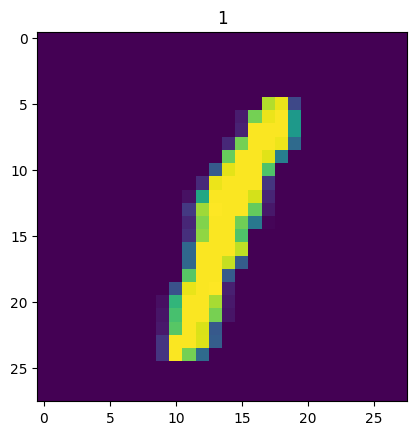

In [ ]:
random_number = random.choice(range(len(train_dataset)))
print(random_number)
image, label = train_dataset[random_number]

print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

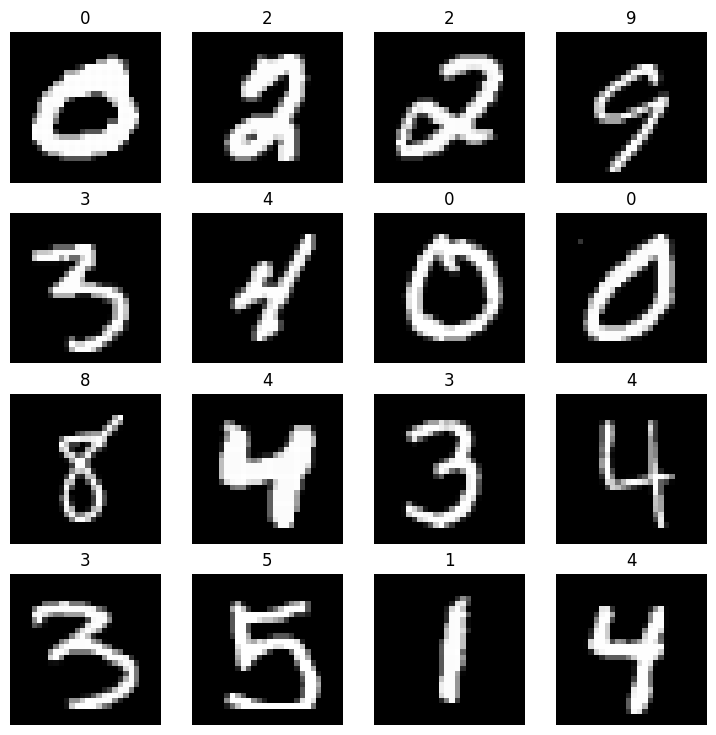

In [ ]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_dataset), size=[1]).item()
    img, label = train_dataset[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(label)
    plt.axis(False);

In [ ]:

class MyMnist_ModelV0(nn.Module):
  def __init__(self,  input_shape: int, hidden_units: int, hidden_units2: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units),  # in_features = number of features in a data sample (784 pixels)
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units2),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units2, out_features=output_shape)
        )

  def forward(self, x):
      return self.layer_stack(x)


In [ ]:
# instance of the model
model_0 = MyMnist_ModelV0(input_shape=784,
                          hidden_units=256,
                          hidden_units2=128,
                          output_shape=10
)
model_0.to("cpu")

MyMnist_ModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [ ]:
!pip install torchmetrics
# set up an optimizer, loss and metric
import torchmetrics
from torchmetrics import Accuracy


loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)
accuracy_function = Accuracy(task="multiclass", num_classes=10)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time



In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()
epochs = 16

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_loss = 0
  for batch, (X, y) in enumerate(train_loader):
    model_0.train()
    y_pred = model_0(X)
    loss = loss_function(y_pred, y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch % 400 == 0:
      print(f"Looked at {batch*len(X)}/{len(train_loader.dataset)} samples")
  train_loss /= len(train_loader)

  # Testing

  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X, y in test_loader:
      test_pred = model_0(X)
      test_loss += loss_function(test_pred, y).item()
      test_acc += accuracy_function(test_pred, y).item()
    test_loss /= len(test_loader)
    test_acc /= len(test_loader)
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))




  0%|          | 0/16 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/48000 samples
Looked at 25600/48000 samples

Train loss: 0.48802 | Test loss: 0.22507, Test acc: 0.93%

Epoch: 1
-------
Looked at 0/48000 samples
Looked at 25600/48000 samples

Train loss: 0.18548 | Test loss: 0.17559, Test acc: 0.94%

Epoch: 2
-------
Looked at 0/48000 samples
Looked at 25600/48000 samples

Train loss: 0.13187 | Test loss: 0.13346, Test acc: 0.96%

Epoch: 3
-------
Looked at 0/48000 samples
Looked at 25600/48000 samples

Train loss: 0.10453 | Test loss: 0.11671, Test acc: 0.97%

Epoch: 4
-------
Looked at 0/48000 samples
Looked at 25600/48000 samples

Train loss: 0.08489 | Test loss: 0.11867, Test acc: 0.96%

Epoch: 5
-------
Looked at 0/48000 samples
Looked at 25600/48000 samples

Train loss: 0.07176 | Test loss: 0.09760, Test acc: 0.97%

Epoch: 6
-------
Looked at 0/48000 samples
Looked at 25600/48000 samples

Train loss: 0.06237 | Test loss: 0.09648, Test acc: 0.97%

Epoch: 7
-------
Looked at 0/48000 samples
Looked at 25600/48000 samp

In [ ]:
# predictions and results


torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
                data_loader: torch.utils.data.DataLoader,
               loss_function: torch.nn.Module,
               accuracy_function):
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      #Make predictions

      y_pred = model(X)

      # Accumulate the loss and acc values per batch

      loss += loss_function(y_pred, y)
      acc += accuracy_function(y_pred.argmax(dim=1),
                               y
                               )

      # Scale loss and acc to find the average loss/ac per batch

    loss /= len(data_loader)
    acc /= len(data_loader)

  return { "model_name": model.__class__.__name__,
          "model_loss": loss.item(),
           "model_acc": acc.item()}

# Calculate the model 0 results on test dataset

model_0_results = eval_model(model=model_0,
                             data_loader=test_loader,
                             loss_function=loss_function,
                             accuracy_function=accuracy_function)
model_0_results








  0%|          | 0/188 [00:00<?, ?it/s]

{'model_name': 'MyMnist_ModelV0',
 'model_loss': 0.09565939754247665,
 'model_acc': 0.9724900126457214}

In [ ]:
# Saving the model for inferences

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model_0.state_dict():
    print(param_tensor, "\t", model_0.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

PATH = "state_dict_model.pth"
torch.save(model_0.state_dict(), PATH)


Model's state_dict:
layer_stack.1.weight 	 torch.Size([256, 784])
layer_stack.1.bias 	 torch.Size([256])
layer_stack.3.weight 	 torch.Size([128, 256])
layer_stack.3.bias 	 torch.Size([128])
layer_stack.5.weight 	 torch.Size([10, 128])
layer_stack.5.bias 	 torch.Size([10])
Optimizer's state_dict:
state 	 {0: {'momentum_buffer': None}, 1: {'momentum_buffer': None}, 2: {'momentum_buffer': None}, 3: {'momentum_buffer': None}, 4: {'momentum_buffer': None}, 5: {'momentum_buffer': None}}
param_groups 	 [{'lr': 0.1, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'params': [0, 1, 2, 3, 4, 5]}]


In [ ]:
# Load model
load_model = MyMnist_ModelV0(input_shape=784,
                          hidden_units=256,
                          hidden_units2=128,
                          output_shape=10
)
load_model.load_state_dict(torch.load(PATH))
load_model.eval()

MyMnist_ModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [ ]:
# print true if the model trained and the model saved and loaded are the same
iguales = all([torch.equal(p1, p2) for p1, p2 in zip(model_0.state_dict().values(), load_model.state_dict().values())])
print(iguales)

True


In [ ]:
from PIL import Image

filepath= "/content/eight.png"
imagen = Image.open(filepath)
invertir_valores = transforms.Lambda(lambda x: 1 - x)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
    transforms.Resize((28,28)),
    invertir_valores
])

image = transform(imagen)

def model_inference(image, model):
  with torch.inference_mode(): # inference mode of pytorch
    prediction = model(image)
  probabilities = torch.softmax(prediction, dim=1)
  return {str(i) : float(probabilities[0][i]) for i in range(10)}

def get_predicted_class(predictions):
  predicted_class = max(predictions, key=predictions.get)     # Find the class with the highest probability
  predicted_probability = predictions[predicted_class]     # Get the probability corresponding to the predicted class
  return predicted_class, predicted_probability

predictions = model_inference(image, load_model)
predicted_class, predicted_probability = get_predicted_class(predictions)

predicted_class, predicted_probability


('8', 0.996691107749939)